# Forest Cover Type Prediction
Use cartographic variables to classify forest categories

## PyCaret

#### Problem
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

    1 - Spruce/Fir
    2 - Lodgepole Pine
    3 - Ponderosa Pine
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Douglas-fir
    7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

#### Evaluation Metric
Multi-class classification accuracy

In [ ]:
# Install PyCaret
!pip install pycaret

     |████████████████████████████████| 256kB 4.5MB/s 
     |████████████████████████████████| 66.1MB 43kB/s 
     |████████████████████████████████| 266kB 51.4MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 6.8MB 49.1MB/s 
     |████████████████████████████████| 1.2MB 44.7MB/s 
     |████████████████████████████████| 266kB 51.3MB/s 
     |████████████████████████████████| 12.4MB 39.9MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 1.6MB 50.5MB/s 
     |████████████████████████████████| 604kB 34.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 3.1MB 50.8MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 2.1MB 46.4MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
  Installing build dependencies ... done
  Getting requi

In [ ]:
# install watermark
!pip install watermark

## Imports

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

#import pycaret 
import pycaret   
from pycaret.classification import *  #import classification module 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# make pandas show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formating the plots
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['figure.figsize'] = (15, 5)
m.rcParams['font.size'] = 12
m.rcParams['legend.fontsize'] = 'large'
m.rcParams['figure.titlesize'] = 'medium'
m.rcParams['text.color'] = 'k'
sns.set(rc={'figure.figsize':(15,5)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Forest Cover Type Prediction -- Jessica Cabral" --iversions
%watermark -n -t -z

pandas     1.0.5
matplotlib 3.2.2
seaborn    0.10.1
numpy      1.18.5
pycaret    2.0.0
Forest Cover Type Prediction -- Jessica Cabral
Fri Aug 28 2020 10:54:04 UTC


In [ ]:
np.random.seed(42)
random.seed(42)
random_seed = 42

## Import Data

In [ ]:
#train = pd.read_csv('../../data/train.csv')
#test = pd.read_csv('../../data/test.csv')
#sample_submission = pd.read_csv('../../data/sampleSubmission.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sampleSubmission.csv')


print('Train: {}'.format(train.shape))
print('test: {}'.format(test.shape))
print('sample_submission: {}'.format(sample_submission.shape))

Train: (15120, 56)
test: (565892, 55)
sample_submission: (565892, 2)


In [ ]:
display(train.head(), test.head())

train.shape, test.shape

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


((15120, 56), (565892, 55))

## Pre-Processing

In [ ]:
# remove de ID column

train = train.drop(columns=['Id'], axis=1)
test = test.drop(columns=['Id'], axis=1)

train.shape, test.shape

((15120, 55), (565892, 54))

## Train and test split

In [ ]:
# separate training and test dataset

train, validation = train_test_split(train, test_size=0.33, random_state=random_seed)

train.shape, validation.shape

((10130, 55), (4990, 55))

We split the training data into training and validation, why?

We are going to setup pycaret to use only the training sample to subdivide again into test and train
These new samples will be used to train and validate the model metrics by the pycaret itself

After all the training and tuning the model, we will use our validation sample to validate the model against data it haven't seen yet, thereby generating our most important metrics: Accuracy test data

Here is a drawing that tries to illustrate this:

![how_it_works](../../imgs/how_it_works.png)

pretty cute my drawing isn't it?
:D

## Setup pycaret

In [ ]:
exp_clf = setup(data = train,           # train data
              target = 'Cover_Type',   # feature that we are trying to predict
              train_size = 0.7)     # proportion of training data

Setup Succesfully Completed!


,Description,Value
0,session_id,1974
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(10130, 55)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,44
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Train and compare models

This function train all the models available in the model library and scores them using Stratified Cross Validation. The output prints a score grid with Accuracy, AUC, Recall, Precision, F1, Kappa and MCC (averaged accross folds), determined by fold parameter.

#### Default params
compare_models(blacklist = None, whitelist = None, fold = 10,  round = 4,  sort = ‘Accuracy’,  n_select = 1, turbo = True, verbose = True)


In [ ]:
%%time

# Train the modelos using default params
best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8384,0.0000,0.8389,0.8355,0.8352,0.8114,0.8120,53.8733
1,Light Gradient Boosting Machine,0.8306,0.0000,0.8311,0.8278,0.8275,0.8024,0.8029,2.1833
2,Extra Trees Classifier,0.8159,0.0000,0.8165,0.8136,0.8134,0.7853,0.7857,4.2662
3,Random Forest Classifier,0.8037,0.0000,0.8043,0.8004,0.7999,0.7710,0.7716,1.3861
4,Gradient Boosting Classifier,0.7694,0.0000,0.7699,0.7666,0.7638,0.7310,0.7322,13.6846
5,Extreme Gradient Boosting,0.7581,0.0000,0.7587,0.7539,0.7513,0.7178,0.7192,7.1277
6,K Neighbors Classifier,0.7522,0.0000,0.7532,0.7470,0.7403,0.7109,0.7138,0.4252
7,Ada Boost Classifier,0.7140,0.0000,0.7144,0.7087,0.7083,0.6663,0.6672,3.8094
8,Decision Tree Classifier,0.6900,0.0000,0.6911,0.7282,0.6868,0.6383,0.6484,0.4089
9,Linear Discriminant Analysis,0.6324,0.0000,0.6326,0.6369,0.6332,0.5712,0.5716,1.2014


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f2a042f3390>,
                    n_jobs=-1)
CPU times: user 22min 28s, sys: 58.6 s, total: 23min 27s
Wall time: 25min 49s


The AUC will be returned as zero (0.0) If target variable is multiclass (more than 2 classes), like in our case

Our winner is the CatBoost Classifier, with 83,84% Accuracy

## Model Optimization

Let's see if we can optimize our model accuracy using pycaret tune_model function

In [ ]:
tuned_catboost = tune_model(best_model)
print(tuned_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.0000,0.8198,0.8176,0.8160,0.7894,0.7902
1,0.7969,0.0000,0.7975,0.7914,0.7924,0.7631,0.7636
2,0.8096,0.0000,0.8097,0.8048,0.8049,0.7778,0.7786
3,0.8138,0.0000,0.8142,0.8116,0.8099,0.7828,0.7836
4,0.8378,0.0000,0.8383,0.8348,0.8349,0.8108,0.8112
5,0.8082,0.0000,0.8088,0.8021,0.8037,0.7762,0.7767
6,0.8237,0.0000,0.8241,0.8206,0.8212,0.7943,0.7946
7,0.8265,0.0000,0.8270,0.8233,0.8234,0.7976,0.7981
8,0.8181,0.0000,0.8190,0.8129,0.8145,0.7877,0.7881
9,0.8166,0.0000,0.8170,0.8132,0.8109,0.7861,0.7873


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f2a044448d0>,
                    n_jobs=None)


with the default parameters 

'tune_model(estimator = None,  fold = 10,  round = 4,  n_iter = 10, custom_grid = None,  optimize = ‘Accuracy’, choose_better = False, verbose = True)'

our accuracy down to 81,71%

interesting...

Let's check if we can do someting about it

In [ ]:
# Increse the number of iterations (n_iter) to 35. 
# Increasing the n_iter parameter will for sure increase the training time but will 
# give a much better performance.

tuned_catboost_v1 = tune_model(best_model, n_iter = 35)
print(tuned_catboost_v1)

# you can try differents values for n_iter param

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8547,0.0000,0.8550,0.8550,0.8530,0.8305,0.8311
1,0.8265,0.0000,0.8273,0.8223,0.8227,0.7976,0.7982
2,0.8491,0.0000,0.8497,0.8450,0.8461,0.8239,0.8243
3,0.8547,0.0000,0.8549,0.8532,0.8526,0.8305,0.8309
4,0.8660,0.0000,0.8664,0.8635,0.8644,0.8437,0.8438
5,0.8604,0.0000,0.8608,0.8577,0.8565,0.8371,0.8379
6,0.8420,0.0000,0.8425,0.8396,0.8396,0.8157,0.8161
7,0.8590,0.0000,0.8593,0.8564,0.8568,0.8355,0.8357
8,0.8505,0.0000,0.8514,0.8471,0.8474,0.8256,0.8261
9,0.8505,0.0000,0.8508,0.8478,0.8473,0.8256,0.8262


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f2a04d5c940>,
                    n_jobs=None)


In [ ]:
tuned_catboost_v1.get_params()

{'estimator': <catboost.core.CatBoostClassifier at 0x7f2a04d5c940>,
 'estimator__border_count': 200,
 'estimator__depth': 8,
 'estimator__iterations': 1000,
 'estimator__l2_leaf_reg': 3,
 'estimator__learning_rate': 0.1,
 'estimator__random_state': 1974,
 'estimator__silent': True,
 'n_jobs': None}

We got 85,13% Accuracy!


In [ ]:
# Let's try a custom grid

# tune hyperparameters with custom_grid
params = {#'early_stopping_rounds': 15,
          'max_depth': list(range(3,10,1)),
          'learning_rate': [0.001, 0.01, 0.015, 0.02, 0.04, 0.1],
          #'n_estimators': list(range(100,300,50)),
          'iterations': [1000, 500, 1500, 800, 1100, 1200],
          }

tuned_catboost_v2 = tune_model(best_model, n_iter = 35, custom_grid = params)
print(tuned_catboost_v2)

# you can try differents values for n_iter param

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8477,0.0000,0.8480,0.8475,0.8457,0.8223,0.8229
1,0.8336,0.0000,0.8344,0.8300,0.8300,0.8059,0.8064
2,0.8350,0.0000,0.8356,0.8310,0.8320,0.8075,0.8078
3,0.8519,0.0000,0.8521,0.8511,0.8493,0.8272,0.8279
4,0.8575,0.0000,0.8579,0.8549,0.8558,0.8338,0.8339
5,0.8646,0.0000,0.8650,0.8624,0.8609,0.8420,0.8429
6,0.8491,0.0000,0.8495,0.8468,0.8463,0.8239,0.8244
7,0.8519,0.0000,0.8522,0.8492,0.8495,0.8272,0.8276
8,0.8449,0.0000,0.8458,0.8408,0.8412,0.8190,0.8196
9,0.8392,0.0000,0.8398,0.8364,0.8362,0.8124,0.8130


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f2a04e9dcc0>,
                    n_jobs=None)


In [ ]:
tuned_catboost_v2.get_params()

{'estimator': <catboost.core.CatBoostClassifier at 0x7f2a04e9dcc0>,
 'estimator__iterations': 1100,
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': 8,
 'estimator__random_state': 1974,
 'estimator__silent': True,
 'n_jobs': None}

not better

## Model Evaluate

In [ ]:
#evaluate a model
evaluate_model(tuned_catboost_v1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

It's possible to plot the metrics indivually

Here is a example:

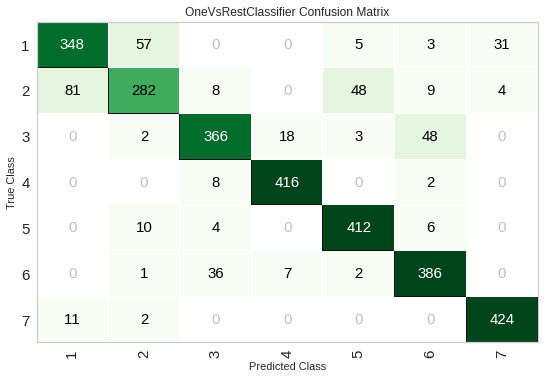

In [ ]:
# Compare test data predictions and results
plot_model(tuned_catboost_v1, plot='confusion_matrix')

## Interpret the Model

# interpret overall model 
interpret_model(tuned_catboost_v2)

# correlation shap plot
interpret_model(tuned_catboost_v2, plot = 'correlation')

# interactive reason plot
interpret_model(tuned_catboost_v2, plot = 'reason')

Warnings:
    interpret_model doesn’t support multiclass problems.

## Predictions

In [ ]:
# predict in train dataframe
y_train_pred = predict_model(tuned_catboost_v1)

# predict the test dataframe
y_pred = predict_model(tuned_catboost_v1, data = test)

In [ ]:
# view the predictions
display(y_train_pred[['Cover_Type', 'Label']], y_pred['Label'])

,Cover_Type,Label
0,1,7
1,5,5
2,4,4
3,1,1
4,2,5
...,...,...
3035,7,7
3036,6,6
3037,4,4
3038,1,1


0         1
1         1
2         1
3         1
4         2
         ..
565887    3
565888    3
565889    3
565890    3
565891    3
Name: Label, Length: 565892, dtype: int64

In [ ]:
# Finalize model
final_tuned_catboost_v1 = finalize_model(tuned_catboost_v1)

In [ ]:
# Save model
save_model(final_tuned_catboost_v1, 'final_tuned_catboost_v1_30082020'

## Submission 

In [ ]:
#sample_submission
sample_submission['Cover_Type'] = y_pred['Label'].tolist()

# Lets see the head of our submission file
display(sample_submission.head())

# Analyse the % of Cover Types predicted
display(sample_submission['Cover_Type'].value_counts(normalize=True)*100)

# Save the 
file_name = '3-sub_catboost_pycaret' 
sample_submission.to_csv('{}.csv'.format(file_name), index=False)

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,2


2    38.360677
1    36.903862
5     6.884706
3     6.505305
7     6.265506
6     4.653892
4     0.426053
Name: Cover_Type, dtype: float64